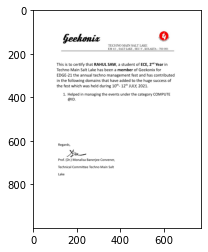

In [59]:
from pdf2image import convert_from_path
import numpy as np
import imutils
from matplotlib import pyplot as plt

images = convert_from_path('C:/Users/rw200/geek_tria0000.pdf',poppler_path='C:/Program Files/poppler-22.01.0/Library/bin')
#Visualize the converted image
for img in images:
    img = np.array(img)
    #resize the image to height of 500 and keep the same aspect ratio
    ratio = img.shape[0]/500.0
    plt.imshow(imutils.resize(img,height=1000))
    #save into the file page0.jpg
for i in range(len(images)):
    images[i].save('page'+ str(i) +'.jpg', 'JPEG')
img=images

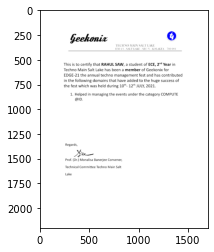

In [67]:
import cv2

contrast = 0
brightness = 0


def funcBrightContrast(img, bright=255):
    """Adjust the image contrast/brightness.
    Parameters
    ----------
    img : numpy ndarray
        The input image.
    bright : int
        The brightness level.
    Returns
    -------
    numpy ndarray
        The image whose brightness/contrast is adjusted.
    """
    effect = apply_brightness_contrast(img, bright, contrast)
    # save the final output image
    # cv2.imwrite("./outputs/" + output_img, effect)
    return effect


def apply_brightness_contrast(input_img, brightness=255, contrast=0):
    """Perform the color correction of an input image.
    Parameters
    ----------
    input_img : numpy ndarray
        The input image.
    brightness : int
        the brightness level.
    contrast : int
        the contrast level.
    Returns
    -------
    numpy ndarray
        The image whose brightness is adjusted .
    """
    brightness = 80
    contrast = 60

    # if brightness is not equal to 0
    if (brightness != 0):
        if (brightness > 0):
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        # calculating the alpha value
        alpha_b = (highlight - shadow) / 255
        # set the gamma value
        gamma_b = shadow
        # to change the brightness in order to use the cv2.addWeighted()
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    # if contrast does not equal 0
    if contrast != 0:
        f = float(131 * (contrast + 127)) / (127 * (131 - contrast))
        # calculating the alpha value
        alpha_c = f
        # set the gamma value
        gamma_c = 127*(1-f)
        # to change the contrast in order to use the cv2.addWeighted()
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)
    # return color corrected image
    return buf

def remove_white_space(image):
 gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 blur = cv2.GaussianBlur(gray, (25,25), 0)
 thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
 noise_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
 opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, noise_kernel, iterations=2)
 close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
 close = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, close_kernel, iterations=3)
# Find enclosing boundingbox and crop ROI\n”,
 coords = cv2.findNonZero(close)
 x,y,w,h = cv2.boundingRect(coords)
 return image[y:y+h, x:x+w]

img = cv2.imread('C:/Users/rw200/page0.jpg')
img=funcBrightContrast(img)
remove_white_space(img)
plt.imshow(img)

<ipython-input-62-1a59780c9cf7>:68: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  image_label_overlay = label2rgb(blobs_labels, image=img)


the_biggest_component: 18919
average: 790.1725490196078
a4_small_size_outliar_constant: 2451.704014939309
a4_big_size_outliar_constant: 44130.67226890757


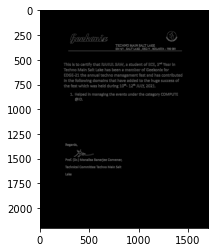

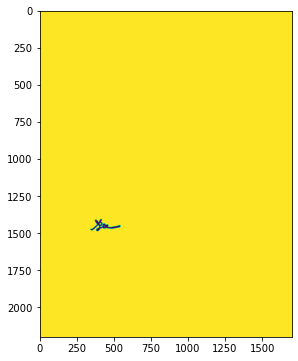

In [62]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure, morphology
from skimage.color import label2rgb
from skimage.measure import regionprops
import numpy as np

constant_parameter_1 = 84
constant_parameter_2 = 250
constant_parameter_3 = 100

# the parameter is used to remove big size connected pixels outliar
constant_parameter_4 = 18

# read the input image

img = cv2.threshold(img, 1, 1, cv2.THRESH_BINARY)[1]  # ensure binary

img = np.array(images[-1])
original = img.copy()
ratio = img.shape[0]/500.0
#img = imutils.resize(img,height=500)
orig = img.copy()
#converting to grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray,'gray')
edged = cv2.Canny(gray,80,200)
plt.imshow(edged,'gray')
img=gray

# connected component analysis by scikit-learn framework
blobs = img > img.mean()
blobs_labels = measure.label(blobs, background=1)
image_label_overlay = label2rgb(blobs_labels, image=img)

fig, ax = plt.subplots(figsize=(10, 6))

'''
# plot the connected components (for debugging)
ax.imshow(image_label_overlay)
ax.set_axis_off()
plt.tight_layout()
plt.show()
'''

the_biggest_component = 0
total_area = 0
counter = 0
average = 0.0
for region in regionprops(blobs_labels):
    if (region.area > 2):
        total_area = total_area + region.area
        counter = counter + 1
    # print region.area # (for debugging)
    # take regions with large enough areas
    if (region.area >= 2):
        if (region.area > the_biggest_component):
            the_biggest_component = region.area

average = (total_area/counter)
print("the_biggest_component: " + str(the_biggest_component))
print("average: " + str(average))

# experimental-based ratio calculation, modify it for your cases
# a4_small_size_outliar_constant is used as a threshold value to remove connected outliar connected pixels
# are smaller than a4_small_size_outliar_constant for A4 size scanned documents
a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))

# experimental-based ratio calculation, modify it for your cases
# a4_big_size_outliar_constant is used as a threshold value to remove outliar connected pixels
# are bigger than a4_big_size_outliar_constant for A4 size scanned documents
a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))

# remove the connected pixels are smaller than a4_small_size_outliar_constant
pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)
# remove the connected pixels are bigger than threshold a4_big_size_outliar_constant 
# to get rid of undesired connected pixels such as table headers and etc.
component_sizes = np.bincount(pre_version.ravel())
too_small = component_sizes > (a4_big_size_outliar_constant)
too_small_mask = too_small[pre_version]
pre_version[too_small_mask] = 0
# save the the pre-version which is the image is labelled with colors
# as considering connected components
plt.imsave('pre_version.png', pre_version)

# read the pre-version
img = cv2.imread('pre_version.png', 0)
# ensure binary
img = cv2.threshold(img, 0, 1, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# save the the result
cv2.imwrite("./outputs/output.png", img)
plt.imshow(img)